<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic17/2_GenAI_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

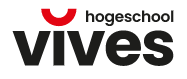<br>


**DEEP LEARNING**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# **GENERATIVE AI WITH HUGGING FACE**

## Building Generative AI Applications with Gradio

To become familiar with the possibilities of generative AI, let's go through the examples of the following online course:

https://learn.deeplearning.ai/huggingface-gradio/

The examples in the course make use of an API. Here it is shown how to run the examples 'locally' in Google Colab. The code looks very similar. For more information, check the [Pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines) documentation page on Hugging Face.

In Google Colab you first need to install
- the [Hugging Face](https://huggingface.co/) `transformers` library
- and the [gradio](https://www.gradio.app/) library.

In [ ]:
!pip install transformers datasets

In [ ]:
!pip install gradio

Next we import `pipeline` from the `transformers` library and `gradio`. For the latter, it is common to use alias `gr`:

In [3]:
from transformers import pipeline
import gradio as gr

We're ready now to go through the course!

### L1: NLP tasks with a simple interface

#### Building a text summarization app

In [4]:
get_completion = pipeline("summarization",
                          model="sshleifer/distilbart-cnn-12-6")  # sshleifer with double s! (typo in example notebook on deeplearning.ai)

def summarize(input):
    output = get_completion(input)
    return output[0]['summary_text']

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [5]:
text = ('''The tower is 324 metres (1,063 ft) tall, about the same height
        as an 81-storey building, and the tallest structure in Paris.
        Its base is square, measuring 125 metres (410 ft) on each side.
        During its construction, the Eiffel Tower surpassed the Washington
        Monument to become the tallest man-made structure in the world,
        a title it held for 41 years until the Chrysler Building
        in New York City was finished in 1930. It was the first structure
        to reach a height of 300 metres. Due to the addition of a broadcasting
        aerial at the top of the tower in 1957, it is now taller than the
        Chrysler Building by 5.2 metres (17 ft). Excluding transmitters, the
        Eiffel Tower is the second tallest free-standing structure in France
        after the Millau Viaduct.''')

get_completion(text)

[{'summary_text': ' The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building in Paris . It is the second tallest free-standing structure in France after the Millau Viaduct . It was the first structure in the world to reach a height of 300 metres . The Eiffel Tower is now taller than the Chrysler Building in New York City by 5.2 metres (17 ft)'}]

Or using function `summarize`:

In [6]:
summarize(text)

' The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building in Paris . It is the second tallest free-standing structure in France after the Millau Viaduct . It was the first structure in the world to reach a height of 300 metres . The Eiffel Tower is now taller than the Chrysler Building in New York City by 5.2 metres (17 ft)'

#### Trying out the Hugging Face Inference API

First get a Hugging Face Inference API key: https://youtu.be/jo_fTD2H4xA?si=GNrDbhkPNOqu9HGa


Copy the key from the Hugging Face website and store it as an environment variable:

In [11]:
import os, getpass

os.environ["HF_API_KEY"] = getpass.getpass()

··········


`os.environ` is a mapping object that represents your environmental variables. It can be used to get, set, and delete environmental variables. Environmental variables are useful for storing sensitive information like API keys. By storing them in environmental variables, you can avoid hardcoding them in your code, which can be a security risk. Using `getpass()` it is possible to safely assign your HuggingFace API token to environmental variable `'HF_API_KEY'`.

Another common and secure way to deal with API tokens is to store them in an .env-file, which can be created easily using the Linux `echo` command:

In [ ]:
!echo "HF_API_KEY=your_key" > .env

Of course you need to replace `your_key` by the actual key you copy-pasted from the Hugging Face website.

Check if the .env-file indeed contains your key:

In [ ]:
!cat .env

To be able to run the code from the course we have to install the `dotenv` library:

In [ ]:
!pip install python-dotenv

This is the code snippet from the course to read the .env-file and assign your key to variable `hf_api_key`:

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']
hf_api_key

Of course it is safer to delete commands and output that display your key!

However, if you are using Google Colab, it is easier to save your API keys using the *Secrets* pane on the left. The keys you store there are private and visible only to you, which implies this is also a secure way of dealing with API tokens. Once you have stored a key, it can be used in all of the notebooks you create, if you toggle the notebook access for that key.

Here, we have stored our HuggingFace API token as `HF_TOKEN` secret:

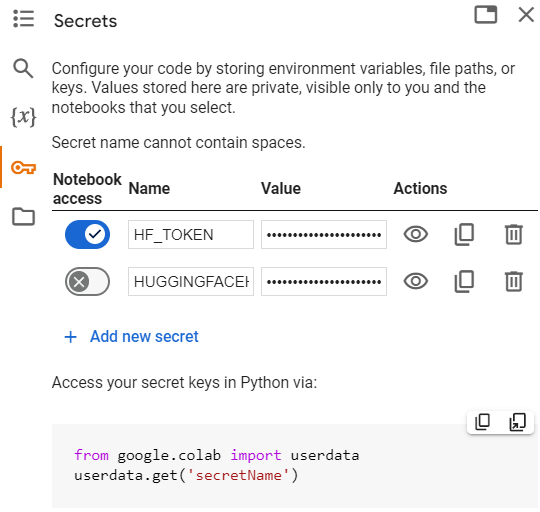

Using the Python code given in the *Secrets* pane, it is straightforward to assign `HF_TOKEN` to variable `hf_api_key`:

In [7]:
from google.colab import userdata
hf_api_key = userdata.get('HF_TOKEN')

Now your HuggingFace API key is set, go to the Hugging Face page for `distilbart-cnn-12-6`:

https://huggingface.co/sshleifer/distilbart-cnn-12-6

On the right, you see a "Deploy" button. Click on it and then on "Inference API" to get the `API_URL`. You may also copy-paste the following code:

In [8]:
import requests

API_URL = "https://api-inference.huggingface.co/models/sshleifer/distilbart-cnn-12-6"
headers = {"Authorization": f"Bearer {hf_api_key}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()

output = query(dict(inputs=text))
output

[{'summary_text': ' The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building in Paris . It is the second tallest free-standing structure in France after the Millau Viaduct . It was the first structure in the world to reach a height of 300 metres . The Eiffel Tower is now taller than the Chrysler Building in New York City by 5.2 metres (17 ft)'}]

It's easy now to redefine the `summarize` function so it calls the API instead of using the pipeline:



In [9]:
def summarize(input):
    output = query(dict(inputs=text))
    return output[0]['summary_text']

In [10]:
summarize(text)

' The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building in Paris . It is the second tallest free-standing structure in France after the Millau Viaduct . It was the first structure in the world to reach a height of 300 metres . The Eiffel Tower is now taller than the Chrysler Building in New York City by 5.2 metres (17 ft)'

Notice how much faster the query is executed using the API!

#### Getting started with Gradio `gr.Interface`

In [ ]:
gr.close_all()
demo = gr.Interface(fn=summarize,  # function summarize
                    inputs="text", outputs="text")
demo.launch()

You can add `demo.launch(share=True)` to create a public link to share with your team or friends:

In [ ]:
demo.launch(share=True)

#### Building a Named Entity Recognition app

In [ ]:
get_completion = pipeline("ner", model="dslim/bert-base-NER")

def ner(input):
    output = get_completion(input)
    return {"text": input, "entities": output}

In [ ]:
gr.close_all()
demo = gr.Interface(fn=ner,  # function ner
                    inputs=[gr.Textbox(label="Text to find entities", lines=2)],
                    outputs=[gr.HighlightedText(label="Text with entities")],
                    title="NER with dslim/bert-base-NER",
                    description="Find entities using the `dslim/bert-base-NER` model under the hood!",
                    allow_flagging="never",
                    #Here we introduce a new tag, examples, easy to use examples for your application
                    examples=["My name is Andrew and I live in California",
                              "My name is Poli and work at HuggingFace"])
demo.launch()

### L2: Image captioning app

In [ ]:
import io
import IPython.display
from PIL import Image
import base64

#### Building an image captioning app

In [ ]:
get_completion = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

def summarize(input):
    output = get_completion(input)
    return output[0]['generated_text']

The free images are available on: https://free-images.com/

In [ ]:
image_url = "https://free-images.com/sm/9596/dog_animal_greyhound_983023.jpg"
display(IPython.display.Image(url=image_url))
get_completion(image_url)

Or using function `summarize`:

In [ ]:
summarize(image_url)

#### Captioning with `gr.Interface()`

In [ ]:
def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))

def captioner(image):
    base64_image = image_to_base64_str(image)
    result = get_completion(base64_image)
    return result[0]['generated_text']

In [ ]:
gr.close_all()
demo = gr.Interface(fn=captioner,
                    inputs=[gr.Image(label="Upload image", type="pil")],
                    outputs=[gr.Textbox(label="Caption")],
                    title="Image Captioning with BLIP",
                    description="Caption any image using the BLIP model",
                    allow_flagging="never",
                    # you need to upload these example images
                    # in colab: left pane > Files > Upload to storage session
                    examples=["christmas_dog.jpg", "bird_flight.jpg", "cow.jpg"])

demo.launch()

### L3: Image generation app

In this lesson [stable diffusion](https://stability.ai/) is applied, which requires the use of GPU.

Switching to GPU in Google Colab is done as follows:
- click on menu item "Runtime"
- select "Change runtime type"
- set "Hardware accelerator" to "T4 GPU"

Next the `diffusers` library (see https://huggingface.co/docs/diffusers/quicktour) needs te be installed:

In [ ]:
!pip install --upgrade diffusers accelerate transformers

As the runtime type has been changed, we also need to re-install gradio:

In [ ]:
!pip install gradio

Of course we also need to re-import the required packages and libraries:

In [ ]:
from transformers import pipeline
from diffusers import DiffusionPipeline
import gradio as gr
import io
import IPython.display
from PIL import Image
import base64

#### Building an image generation app

In [ ]:
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.to("cuda")  # we want to use GPU!!!

def get_completion(prompt):
    return pipeline(prompt).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
prompt = "a dog in a park"
result = get_completion(prompt)
result

#### Generating with `gr.Interface()`

Here we don't need the helper functions from the notebook shown in the course.

In [ ]:
gr.close_all()
demo = gr.Interface(fn=get_completion,  # we may pass function 'get_completion' as it retunrs an image
                    inputs=[gr.Textbox(label="Your prompt")],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never",
                    examples=["the spirit of a tamagotchi wandering in the city of Vienna",
                              "a mecha robot in a favela"])

demo.launch()

#### Building a more advanced interface

In [ ]:
def get_completion(prompt, params):  # we need 'params' as additional input
    return pipeline(prompt, **params).images[0]

def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }

    return get_completion(prompt, params)

In [ ]:
generate(prompt="dog in a park",
         negative_prompt="low quality",  # negative prompt is what we don't want
         steps=25,
         guidance=7,
         # width and height must be divisible by 8
         width=8*40,
         height=8*40)

In [ ]:
gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[
                        gr.Textbox(label="Your prompt"),
                        gr.Textbox(label="Negative prompt"),
                        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                 info="In how many steps will the denoiser denoise the image?"),
                        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                                  info="Controls how much the text prompt influences the result"),
                        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
                    ],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"
                    )

demo.launch()

#### `gr.Blocks()` to the rescue!

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch()

Now try to hide the "advanced options" using Gradio's `Accordion` widget!

In [ ]:
# write your code here!

### L4: Describe-and-Generate game

#### Bringing together the functions from previous lessons!

In [ ]:
from transformers import pipeline

def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))

def captioner(image):
    get_completion = pipeline("image-to-text",model="Salesforce/blip-image-captioning-base")
    base64_image = image_to_base64_str(image)
    result = get_completion(base64_image)
    return result[0]['generated_text']

def generate(prompt):
    diff_pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
    diff_pipeline.to("cuda")  # we want to use GPU!
    return diff_pipeline(prompt).images[0]

#### First attempt, just captioning

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# Describe-and-Generate game 🖍️")
    image_upload = gr.Image(label="Your first image",type="pil")
    btn_caption = gr.Button("Generate caption")
    caption = gr.Textbox(label="Generated caption")

    btn_caption.click(fn=captioner, inputs=[image_upload], outputs=[caption])

gr.close_all()
demo.launch()

#### Let's add generation

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# Describe-and-Generate game 🖍️")
    image_upload = gr.Image(label="Your first image",type="pil")
    btn_caption = gr.Button("Generate caption")
    caption = gr.Textbox(label="Generated caption")
    btn_image = gr.Button("Generate image")
    image_output = gr.Image(label="Generated Image")
    btn_caption.click(fn=captioner, inputs=[image_upload], outputs=[caption])
    btn_image.click(fn=generate, inputs=[caption], outputs=[image_output])

gr.close_all()
demo.launch()

#### Doing it all at once!

In [ ]:
def caption_and_generate(image):
    caption = captioner(image)
    image = generate(caption)
    return [caption, image]

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# Describe-and-Generate game 🖍️")
    image_upload = gr.Image(label="Your first image",type="pil")
    btn_all = gr.Button("Caption and generate")
    caption = gr.Textbox(label="Generated caption")
    image_output = gr.Image(label="Generated Image")

    btn_all.click(fn=caption_and_generate, inputs=[image_upload], outputs=[caption, image_output])

gr.close_all()
demo.launch()

### L5: Chat with any LLM!

Unfortunately the `falcon-40b-instruct` requires too much memory and cannot be loaded into the free Google Colab environment. The serverless HuggingFace Inference API cannot be used either. It is possible though to use [Inference Endpoints](https://huggingface.co/inference-endpoints) as is done in the course, but that service is not for free.

In the following notebooks, we'll use [LangChain](https://www.langchain.com/) to build LLM apps such as chatbots. In the meantime, you can watch the course video to get a better idea how a chatbot is developed!

## Prompt Engineering

Prompt engineering is a technique used when interacting with large language models (LLMs) like GPT-4. It involves crafting well-designed input prompts to guide the model towards generating desired outputs. The goal of prompt engineering is to optimize the communication between a user and the language model, eliciting responses that align with the user's intent or specific requirements.

Check out the following free online course from deeplearning.ai to learn more about prompt engineering:

- https://learn.deeplearning.ai/chatgpt-prompt-eng

---